<a href="https://colab.research.google.com/github/Apur52027/Machine-learing/blob/main/Copy_of_Module_13_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 13 - Practice Notebook
This notebook includes TODO markers **inside code cells** so students complete the missing parts.

In [1]:
#Import all required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


## Load Insurance Dataset

In [3]:
# Load the insurance dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)

# TODO: Display first 5 rows
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

In [6]:
insurance.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [4]:
# TODO: Print dataset info
print(insurance.info())

# TODO: Print descriptive statistics
print(insurance.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

## Define Features and Target

In [5]:
from numpy._core import numeric
# TODO: Set numeric and categorical feature lists

numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]
# TODO: Define target column
target_column = "charges"

# TODO: Create X and y
X =insurance.drop(columns=[target_column])
y = insurance[target_column]

# TODO: Display X head
print(X.head())


   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest


## Train Test Split

In [8]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 6), (268, 6))

## Multiple Linear Regression Pipeline

In [9]:
# Build preprocessing transformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# TODO: Build full pipeline with LinearRegression
model =Pipeline([
     ("preprocess", preprocess),
     ("linreg", LinearRegression())
 ])

# TODO: Fit the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linreg', LinearRegression())])

## Regression Performance Function

In [12]:
# TODO: Complete function to print performance
def print_performance(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")

## Evaluate Model

In [13]:
# Predict for train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# TODO: Print train and test performance
print("Train Set Performance:")
print_performance(y_train, y_train_pred)

print("\nTest Set Performance:")
print_performance(y_test, y_test_pred)

Train Set Performance:
RMSE: 6105.55
MAE: 4208.23
R2 Score: 0.74

Test Set Performance:
RMSE: 5796.28
MAE: 4181.19
R2 Score: 0.78


## Inspect Coefficients

In [15]:
# Extract feature names after OneHotEncoding
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(cat_feature_names)

# Extract model coefficients
linreg = model.named_steps["linreg"]
coeffs = pd.DataFrame({"feature": all_feature_names, "coefficient": linreg.coef_})

# Print intercept and coefficients
print("Intercept:", linreg.intercept_)
coeffs.sort_values("coefficient", ascending=False)

Intercept: -11931.219050326667


,feature,coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Plot Actual vs Predicted

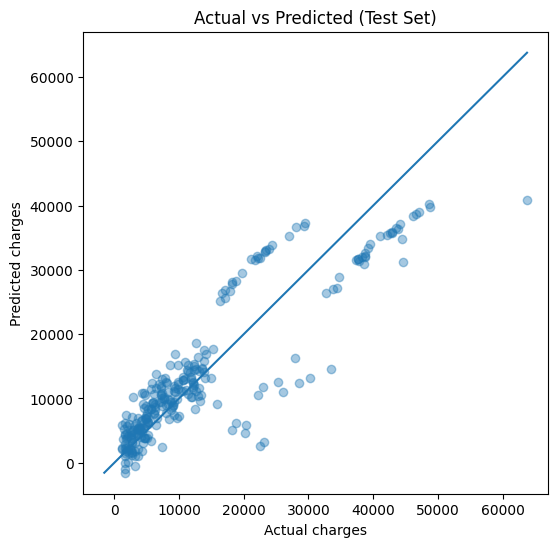

In [16]:
# Plot scatter of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Test Set)")

# Add diagonal line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims)

plt.show()


## Part B: Polynomial Regression Practice

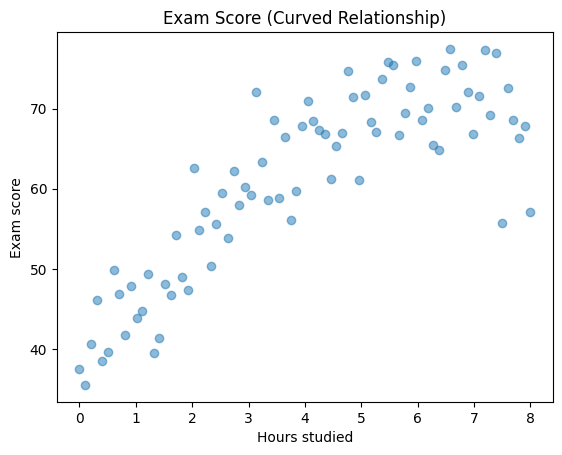

In [17]:
# Generate synthetic curved dataset
np.random.seed(42)

X_hours = np.linspace(0, 8, 80).reshape(-1, 1)
noise = np.random.normal(0, 5, size=X_hours.shape[0])

y_scores = 35 + 12 * X_hours[:, 0] - 1 * (X_hours[:, 0] ** 2) + noise

# Plot the data
plt.scatter(X_hours, y_scores, alpha=0.5)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Exam Score (Curved Relationship)")
plt.show()


In [18]:
# Train test split for polynomial data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hours, y_scores, test_size=0.2, random_state=42
)


In [26]:
# TODO: Create helper to fit polynomial model
def polynomial_model(degree):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree,include_bias=False)),
        ("linreg", LinearRegression())
    ])
    model.fit(X_train_h, y_train_h)
    return model

In [29]:
# TODO: Fit models for degrees 1, 2, 3, 8
result =[]
result_deg=[]
degrees = [1, 2, 3, 8]
for degree in degrees:
    model = polynomial_model(degree)
    y_train_pred = model.predict(X_train_h)
    y_test_pred = model.predict(X_test_h)

    result_deg.append({ 'degree': degree,
        'MAE_train': mean_absolute_error(y_train_h, y_train_pred),
      'RMSE_train': np.sqrt(mean_squared_error(y_train_h, y_train_pred)),
      'R2_train': r2_score(y_train_h, y_train_pred),
      'MAE_test': mean_absolute_error(y_test_h, y_test_pred),
      'RMSE_test': np.sqrt(mean_squared_error(y_test_h, y_test_pred)),
      'R2_test': r2_score(y_test_h, y_test_pred)
      })


In [30]:
results_df = pd.DataFrame(result_deg)
results_df

,degree,MAE_train,RMSE_train,R2_train,MAE_test,RMSE_test,R2_test
0,1,5.385102,6.627386,0.655538,3.666822,5.206104,0.794243
1,2,3.833707,4.824255,0.817477,3.518008,4.305022,0.859304
2,3,3.817058,4.601789,0.833923,3.382100,4.418552,0.851786
3,8,3.443779,4.346083,0.851867,4.151161,4.928777,0.815580


In [31]:
results_df.dtypes

,0
degree,int64
MAE_train,float64
RMSE_train,float64
R2_train,float64
MAE_test,float64
RMSE_test,float64
R2_test,float64


Degree: 1, MAE_train: 5.39
Degree: 2, MAE_train: 3.83
Degree: 3, MAE_train: 3.82
Degree: 8, MAE_train: 3.44


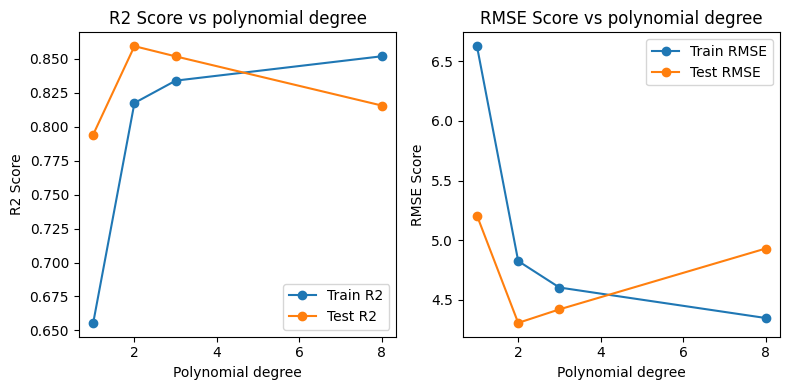

In [43]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

axes[0].plot(results_df['degree'], results_df['R2_train'],marker='o',label='Train R2')
axes[0].plot(results_df['degree'], results_df['R2_test'],marker='o',label='Test R2')
axes[0].set_xlabel("Polynomial degree")
axes[0].set_ylabel("R2 Score")
axes[0].set_title("R2 Score vs polynomial degree")
axes[0].legend()

# RMSE plot
axes[1].plot(results_df['degree'], results_df['RMSE_train'],marker='o',label='Train RMSE')
axes[1].plot(results_df['degree'], results_df['RMSE_test'],marker='o',label='Test RMSE')
axes[1].set_xlabel("Polynomial degree")
axes[1].set_ylabel("RMSE Score")
axes[1].set_title("RMSE Score vs polynomial degree")
axes[1].legend()
plt.tight_layout()
plt.show()



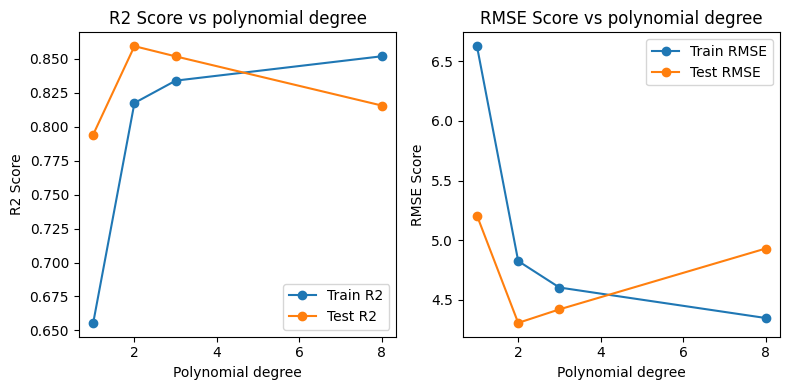

In [45]:
# TODO: Plot fitted curves for each degree (R2,RMSE)
fig, axes = plt.subplots(1,2, figsize=(8,4))

axes[0].plot(results_df['degree'], results_df['R2_train'],marker='o',label='Train R2')
axes[0].plot(results_df['degree'], results_df['R2_test'],marker='o',label='Test R2')
axes[0].set_xlabel("Polynomial degree")
axes[0].set_ylabel("R2 Score")
axes[0].set_title("R2 Score vs polynomial degree")
axes[0].legend()

# RMSE plot
axes[1].plot(results_df['degree'], results_df['RMSE_train'],marker='o',label='Train RMSE')
axes[1].plot(results_df['degree'], results_df['RMSE_test'],marker='o',label='Test RMSE')
axes[1].set_xlabel("Polynomial degree")
axes[1].set_ylabel("RMSE Score")
axes[1].set_title("RMSE Score vs polynomial degree")
axes[1].legend()
plt.tight_layout()
plt.show()



## TODO: Final Reflection
Write answers to:
1. Which polynomial degree overfits and why
2. Which degree gives best generalization
3. What you learned about MLR and polynomial regression.

1. Which polynomial degree overfits and why?

  The degree 8 polynomial clearly overfits.
  Although its training errors are very low, the test RMSE increases and the test R² drops to 0.815. This means the model is fitting noise and small fluctuations in the training data instead of the true underlying pattern, resulting in poor generalization to unseen data

2. Which degree gives the best generalization?

  The degree 2 polynomial gives the best generalization.
  It has the lowest test RMSE and the highest test R² (0.859), showing that it captures the essential relationship without becoming too complex or sensitive to noise.

3. What I learned about MLR and polynomial regression

  Multiple Linear Regression (MLR) models straight-line relationships and works well when the true pattern is linear.

  Polynomial regression extends MLR by adding nonlinear terms (like x^2,x^3) to capture curved relationships.

  Increasing polynomial degree can reduce training error, but too high a degree leads to overfitting.

  The goal is to find a degree that balances bias and variance—complex enough to learn the pattern, but simple enough to generalize well.
